<a href="https://colab.research.google.com/github/spsgim/MachineLearning_Jan23/blob/main/Supervised_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbours

- It's a non-parametric algo, thus, no weights are trained

- Training:
  - stores the data
  - time complexity O(1)
  - space complexity O(n * d)

- Prediction
  - Calculate the distances of all the n points from $x_q$ (TC - O(n * d)
  - Sort the distances O(n * log n)
  - Pick the point O(k) ~ 0
  - Thus, Time Complexity = O(n * d + n * logn)

- k is small; results in overfitting due to outliers
- k is very large; results in underfitting (majority votes will remains the same)

## Code Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bilnkit Case Study

In [2]:
df=pd.read_csv('https://gist.github.com/singhsidhukuldeep/cc3c9597bce35f5f242a921eb3361c75/raw/54227431f0dc8ac1c438f438e2174d181fdda330/blinkit_multiclass.csv')
print(df.shape)
df.head()

(440, 8)


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|purchase history of Fresh food|
|**Milk**|purchase history of milk product|
|**Grocery**|purchase history of Grocery|
|**Frozen**|purchase history of Frozen food|
|**Detergents_Paper**|purchase history of washing products|
|**Delicassen**|purchase history of imported products, cooked meat|
|**class**|Store catgeory based on demand on products|

<Axes: xlabel='class', ylabel='count'>

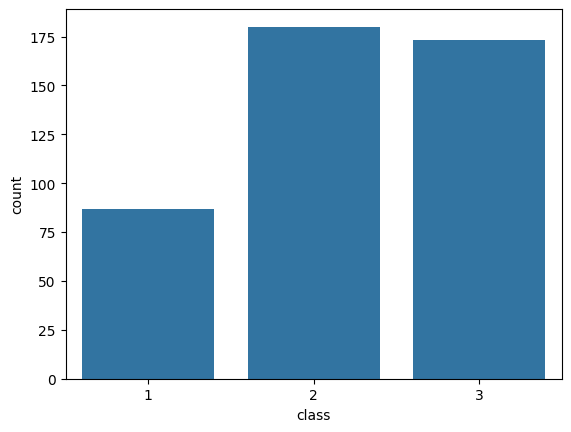

In [3]:
sns.countplot(data=df, x="class")

In [4]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']].copy()
y=df[['class']].copy()

In [5]:
## Performing PCA for visualisation
from sklearn.decomposition import PCA

# reducing features to just 2 features
pca = PCA(n_components=2)
print(X.shape)
X = pca.fit_transform(X)
print(X.shape)

(440, 7)
(440, 2)


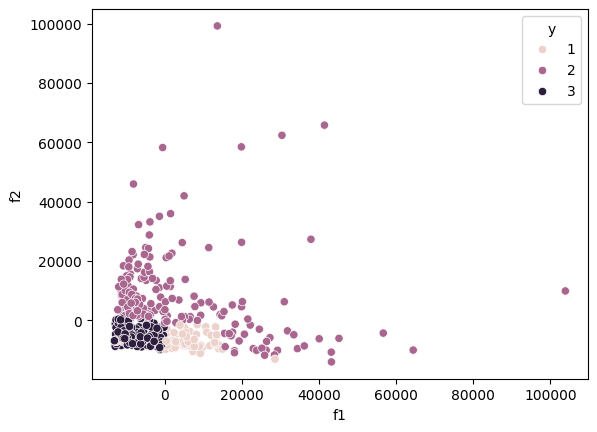

In [6]:
df2 = pd.DataFrame(X, columns=['f1', 'f2'])
df2['y'] = y

sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

### kNN implementation

In [7]:
## train test split
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y.values[:,0], test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,test_size=0.25, random_state=42)

In [8]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 2) (247,)
(83, 2) (83,)
(110, 2) (110,)


In [9]:
# standardisation
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

In [10]:
X_train = (X_train-mu)/sig
X_val = (X_val-mu)/sig
X_test = (X_test-mu)/sig

In [11]:
X_test[:5]

array([[-0.18618677,  1.25387695],
       [-0.19811111, -0.6714474 ],
       [ 1.29052858,  0.30099891],
       [ 1.51969703, -0.95865342],
       [-1.06117163, -0.61202286]])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled[:5]

array([[-0.18618677,  1.25387695],
       [-0.19811111, -0.6714474 ],
       [ 1.29052858,  0.30099891],
       [ 1.51969703, -0.95865342],
       [-1.06117163, -0.61202286]])

In [13]:
## kNN from Scratch
def euclidean_distance(x,xq):
  '''
  Calculate Euclidean Distance
  x: np.array -> X_train
  xq: np.array -> query_point
  '''
  import numpy as np
  try:
    if isinstance(x, np.ndarray) and isinstance(xq, np.ndarray):
      return np.sqrt(np.sum((xq-x)**2,axis=1))
    else:
      print('Input is not numpy.ndarray')
  except Exception as e:
    print(str(e))

def labels_sorted_distances(distances, labels):
  '''
  argsort the euclidean distances
  dist: Distances
  '''
  ind = np.argsort(distances)
  return labels[ind]

def kNN(x,xq,labels,k=5):
  '''
  Calculate majority votes
  x: np.array -> X_train
  xq: np.array -> query_point
  labels: np.array -> labels
  k: hyperparameter (# nearest neighbours)
  '''
  distances = euclidean_distance(x,xq)
  k_points = labels_sorted_distances(distances, labels)[:k]

  class_counts=np.unique(k_points, return_counts= True)
  majority_vote = class_counts[0][class_counts[1].argmax()]
  return majority_vote

In [14]:
kNN(x=X_train_scaled, xq=X_val[50], labels=y_train, k=10)

3

In [15]:
def accuracy(y_true, y_pred):
  return np.mean(y_true == y_pred)

In [16]:
train_accuracy = []
val_accuracy = []

for k in range(1,11):
  y_pred_train = np.zeros(len(X_train))
  y_pred_val = np.zeros(len(X_val))

  for i in range(X_train_scaled.shape[0]):
    y_pred_train[i] = kNN(x = X_train_scaled, xq = X_train[i], labels = y_train, k=k)
  for i in range(X_val.shape[0]):
    y_pred_val[i] = kNN(x = X_train_scaled, xq = X_val[i], labels = y_train, k=k)

  train_acc = accuracy(y_train, y_pred_train)
  train_accuracy.append(train_acc)

  val_acc = accuracy(y_val, y_pred_val)
  val_accuracy.append(val_acc)
  print('k=',k)
  print('Train_Accuracy: %.3f' % train_acc)
  print('Val_Accuracy: %.3f' % val_acc)
  print('*'*50)


k= 1
Train_Accuracy: 1.000
Val_Accuracy: 0.928
**************************************************
k= 2
Train_Accuracy: 0.968
Val_Accuracy: 0.904
**************************************************
k= 3
Train_Accuracy: 0.972
Val_Accuracy: 0.928
**************************************************
k= 4
Train_Accuracy: 0.964
Val_Accuracy: 0.928
**************************************************
k= 5
Train_Accuracy: 0.972
Val_Accuracy: 0.916
**************************************************
k= 6
Train_Accuracy: 0.964
Val_Accuracy: 0.940
**************************************************
k= 7
Train_Accuracy: 0.964
Val_Accuracy: 0.928
**************************************************
k= 8
Train_Accuracy: 0.960
Val_Accuracy: 0.940
**************************************************
k= 9
Train_Accuracy: 0.960
Val_Accuracy: 0.940
**************************************************
k= 10
Train_Accuracy: 0.960
Val_Accuracy: 0.940
**************************************************


Text(0, 0.5, 'Accuracy')

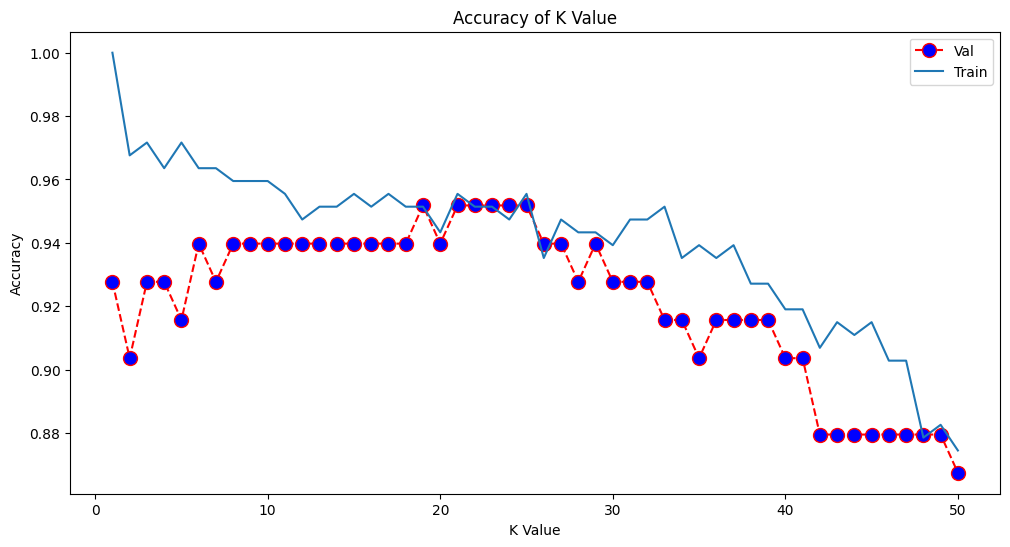

In [17]:
from sklearn.neighbors import KNeighborsClassifier

Acc_val = []
Acc_train = []

for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, y_train)

    Acc_val.append(knn.score(X_val,y_val))
    Acc_train.append(knn.score(X_train, y_train))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), Acc_val, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label="Val")
plt.plot(range(1, 51), Acc_train, label="Train")
plt.title('Accuracy of K Value')
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [18]:
best_k = 6

# predictions
y_pred = np.zeros(len(X_test))

for i in range(X_test.shape[0]):
  y_pred[i] = kNN(x=X_train_scaled, xq= X_test[i], labels= y_train, k= best_k)
print(y_pred.shape)

(110,)


In [19]:
print('Test Accuracy: %.6f'% accuracy(y_test, y_pred))

Test Accuracy: 0.945455


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [21]:
y_pred = knn.predict(X_test_scaled)
knn.score(X_test_scaled, y_test)

0.9454545454545454

In [22]:
x_q = [X_test[50]]
y_q = y_test[50]
print(x_q)
print(y_q)
print(knn.predict(x_q))
print(knn.predict_proba(x_q))
print(knn.kneighbors(x_q))

[array([0.12263833, 1.24645031])]
2
[2]
[[0. 1. 0.]]
(array([[0.18070887, 0.32677292, 0.39396904, 0.41363633, 0.53038291,
        0.58371316]]), array([[101, 176, 108,  30, 130,  52]]))


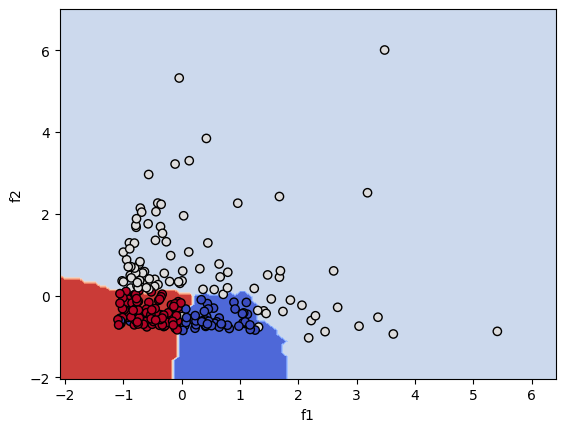

In [23]:
import matplotlib.pyplot as plt
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
from sklearn.inspection import DecisionBoundaryDisplay
# Plotting the boundaries
disp = DecisionBoundaryDisplay.from_estimator(knn,
                                              X_train,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train[:, 0], X_train[:, 1],
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.show()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(classification_report(y_test, y_pred))
plt.show()

              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       0.98      0.91      0.95        47
           3       0.96      1.00      0.98        43

    accuracy                           0.95       110
   macro avg       0.93      0.94      0.93       110
weighted avg       0.95      0.95      0.95       110



### kNN Imputation

In [25]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS

df_imp = pd.read_csv('knn_imputation.csv')
df_imp.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df_imp.shape)
df_imp.head()

Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 28.5MB/s]
(267, 7)


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [26]:
df_imp.isna().sum()

Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('imputer', KNNImputer(n_neighbors=6))  # Step 2: KNNImputer for missing value imputation
])

# Fit and transform the data using the pipeline
X_transformed = pipeline.fit_transform(df_imp)

# Creating dataframe
X_transformed = pd.DataFrame(X_transformed,columns=df_imp.columns)

X_transformed.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.555438,-0.233395,0.187310,-0.319038,-0.554681,-0.272830,-0.175386
1,0.555438,-0.616431,0.204632,-0.139260,-0.281917,-0.165147,-0.051741
2,0.555438,-0.664481,0.091925,0.070736,-0.168617,-0.126353,1.661231
3,0.555438,-0.192716,-0.764292,-0.618222,0.536025,-0.649809,-0.048353
4,0.555438,0.445450,-0.290291,-0.351554,0.097452,-0.428875,0.910606


In [28]:
X_transformed.isna().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

## Assignments

### Q1. Cancer or Not
You are using k-NN to predict whether a datapoint indicates cancer presence or not. You opt for k=3, and for query point (green).

As seen from the figure, blue dots show the absence of cancer and orange ones show the presence of cancer.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/009/139/original/Screenshot_2022-08-22_at_3.37.21_PM.png?1661162896'>

Will it be right to predict that the the query point shows cancer absence? What's the reason for your answer?

Will it require changing the distance metric?

Note: In the options, Weighted Metric refers to (1 / distance) and distance refers to the distance between query point and datapoints

**Options**

* No, because the query point is closer to cancer presence datapoint. We can modify the distance metric as weighted metric
* Yes, because query point is closer to a cancer datapoint. No need to modify the distance metric here.
* No, because the query point is closer to cancer absence datapoint. We can modify the distance metric as weighted metric.
* Yes, because the query point is more likely to show cancer absence. No need for modification in the distance metric

**Correct Answer**
- No, because the query point is closer to cancer presence datapoint. We can modify the distance metric as weighted metric

**Explanation**

For these, we use weighted knn:

- where we divide the distance metric with the inverse of it.
- this gives high weightage to datapoints which are closest to the query point and prevents a false prediction
- Hence the kNN model here, will be able to predict that the query point has Cancer presence.
- Since its closest to two Cancer present datapoint the most

### Q2. k Nearest Neighbors
Given below are the two plots for two KNN models trained on certain data.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/556/original/Untitled.png?1660150643'>

Star in both the plots indicates the query point that we want to classify. In Plot 1, the star is classified into the ' - ' class. While in Plot 2, the star is classified into the ' x ' class. Based on this, which of the following options are true?

**Correct Answer**

- Plot 1 : k = 1
- Plot 2 : k = 1
- Plot 1 : k = 3
- Plot 2 : k = 3

**Explanation**

In plot 1, if we set k=1,

- one ‘-‘ will be the closest neighbor and hence the query point will be labeled as ‘-‘
In plot 1, if we set k=3,

- two ‘-‘ and one ‘x’ will be the closest neighbor and hence the query point will be labeled as ‘- ‘
In plot 2, if we set k=1,

- one ‘x’ will be the closest neighbor and hence the query point will be labeled as ‘x’
In plot 2, if we set k=3,

- two ‘x’ and one ‘-‘ will be the closest neighbor and hence the query point will be labeled as ‘x’

### Q3. Nuts and Bolts of KNN
What can be said about the training and testing phases of KNN?

- K nearest neighbors are searched in the testing phase.

- K-NN algorithm does more computation on test time rather than train time.

- Euclidean distance between query points and neighbors are calculated in training phase.

- In the training phase, data is loaded in the memory.


<b> Correct Answer </b>

- K nearest neighbors are searched in the testing phase.
- K-NN algorithm does more computation on test time rather than train time.
- In the training phase, data is loaded in the memory.

<b> Explanation </b>

The idea of the kNN algorithm is to find

- a k-long list of datapoints that are closest to a query datapoint we want to classify.

Therefore, the training phase is basically loading of training set into memory which is done in O(1) time,

whereas in the testing phase is where

- the algorithm looks for k- nearest neighbours using that stored data.
- Hence testing phase is computationally expensive than training phase

### Q4. Scaling in k-NN
Scaling is important in distance-based algorithms like KNN because-

- Features with higher magnitude will influence the results more.

- Calculation of distances between points are affected by the magnitude of the features.

- The data size(number of records) decreases because of scaling.

- It prevents in getting negative values of features.

<b> Correct Answer </b>

- Features with higher magnitude will influence the results more.
- Calculation of distances between points are affected by the magnitude of the features.

**Explanation**

Scaling helps to bring down the large values of the data so that calculation becomes faster.

- Hence we cannot say, Scaling brings down the size of the data (number of records).

Also since scaling makes the large valued feature be at par with the remaining features,

- It reduces the influence of that large valued feature when calculating the distance vector
- Since when Calculating the distance, the magnitude of the feature plays an important role as seen in Manhattan, Euclidean and Minkowski distance

### Q5. Class determination
Consider the following figure in which we have got (O) as a query point that we want to classify, and negatives (-) and positives (+) as training records.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/924/original/Untitled.png?1648114723'>

What would be the category assigned to the query point, for the values of K = 1, 3, and 5 respectively?

- Negative, Positive, Negative
- Negative, Negative, Negative
- Negative, Negative, Positive
- Positive, Negative, Positive

**Correct Answer**

Negative, Negative, Positive

**Explanation**

- For k=1:
  - Since a ‘-‘ datapoint is the closest to the query point
  - The query point will be classfied as negative.

- For k=3:

  - two ‘-‘ and one ‘+’ datapoints are closest to the query point
  - So, the query point will be classified as negative.

- For k=5:

  - two ‘-‘ and three ‘+’ datapoints are closest to the query point
  - Therefore, the query point will be classified as positive.

### Q6. Selecting K
The K in K-nearest Neighbors determines the number of features that are important to classify a query point $x_q$

Select the correct option based on the statement.

- Statement is absolutely correct
- Statement is absolutely incorrect
- Statement is partially correct
- No conclusion can be made

**Correct Answer**

Statement is absolutely incorrect

<b>Explanation</b>

k-NN algorithm is used to classify test datapoint based on distance metric,

  - is that a test datapoint is classified as Class-1 if there are more number of Class-1 training samples
closer to the test datapoint compared to other Classes training samples.

For Eg:

If value of k = 5 samples, then the 5 closest training samples are selected based on a distance metric

  - and then a voting for most number of samples per class is done.

So if 3 samples belong to Class-1 and 2 belong to Class-5,

  - then that test sample is classified as Class-1 since the majority belongs to Class-1.

Hence the value of k indicates the number of training samples that are needed to classify the test sample.

### Q1. KNN Bias Variance
Following are three graphs where the decision boundary is underfitting, is optimum, and overfitting the training of kdata.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/957/original/Untitled.png?1648214396'>

Which of the following could be the values of K for each of the graphs respectively?

- 1, 3, 21
- 1, 21, 3
- 21, 3, 1
- 21, 23, 41


**Correct Answer**
- 21, 3, 1

**Explanation**

As the value of k decreases, and reaches to 1,

- it means that the new data point will consider only one closest neighbor
- which will tend the decision boundary to overfit.

If we increase the value of k to a large value, the new point will be classified based on more number of data points,

- which might consider many +ve and -ve class label datapoints which can turn
- make the wrong prediction for the test datapoint
- Hence making the model Underfit

Though, choosing a right value of k, is often experimental and it varies from data to data.

- for this question a K=3 will classify the data accurately

### Q2. KNN Time Complexity
What can you conclude about the training time and the testing time complexity of this 1-NN algorithm implemented below, where N is the number of observations, d is the number of features and xq is the query point?

<img src= 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/023/191/original/Screenshot_2023-01-17_at_5.29.45_PM.png?1673955952'>

- Training time : O(N* d) ; Testing time : O(1)
- Training time : O(1) ; Testing time : O(N)
- Training time : O(1) ; Testing time : O(N*d + NlogN)
- Training time : O(1) ; Testing time : O(N*d)

**Correct Answer:**

- Training time : O(1) ; Testing time : O(N*d)

**Explanation:**

- Technically Training phase of kNN does not exist hence it should have complexity as O(1), the for loop just loads the data into the training function hence we do not consider O(N)

- Testing Time Complexity for KNN algorithm is O(Nd+NlogN). Since, in our 1-NN implementation, we are not sorting anything, there will be no Nlog(N), hence time complexity becomes O(N*d).

### Q3. Find Optimal K
**Problem Description:**

Given the training data, find out the best value for K between 1 and 10 (inclusive) for the multiclass classification with KNN.

**Input Format:**

  1. The first line contains the list of features for all the datapoints.
  2. The second line contains the list of class to which the datapoints belong to
  3. Finally the list of features of the query point is passed.

**Output Format:**

Returns the best value of K

**Sample Input:**

`[[ 0.52, 26. ], [ 5.41, 39. ], [ 2.15, 8. ], [ 6. , 28. ], [ 0.96, 9. ]]
[0, 1, 2, 3, 4]
[[ 2.22, 21. ]]`

**Sample Output:**

`2`

**Input Explanation:**

Data with 2 features and 5 classes are taken as two seperate input list.
A query point with two features is also taken as an input.
Output Explanation:

The optimal value of k = 2 is printed.

- After doing all the hyperparameter tuning on the datapoints

In [34]:
import numpy as np
# import kNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier

X_train = np.asarray(X)
y_train = np.asarray(y)

def findOptimalK(X_train, y_train, x_q):

  error_rate = []
  k = []
  # define the range to which the value of k should go
  for i in range(1,11):
    # set the value of k for the model
    knn = KNeighborsClassifier(n_neighbors=i)

    # fit the model on the training data
    knn.fit(X_train, y_train)
    # predict for the query point
    pred_i = knn.predict(x_q)

    # calculates the error of the model
    error_rate.append(np.mean(pred_i != y_train))

    #add the current value of k
    k.append(i)

  # find the index of the minimum error
  index = np.argmin(error_rate)

  # store the best k value which has minimum error
  best_k = k[index]
  return best_k

In [40]:
X_train = [[ 0.52,  26. ], [ 5.41, 39. ], [ 2.15, 8. ], [ 6. , 28. ], [ 0.96, 9. ], [ 3.48, 10.  ],[ 6.81, 27.  ],[ 5.04,  9.  ],[ 4.44, 20.  ],
 [ 3.7 , 22.  ],[ 3.7 , 15.  ],[ 1.41, 33.  ], [ 2.44,  3.  ],[ 0.59,  0.  ], [ 5.33, 10.  ]]
X_train = np.asarray(X_train)

y_train = [0, 1, 2, 1, 2, 0, 1, 0, 3, 0, 2, 1, 0, 5, 0]
y_train = np.asarray(y_train)

xq =[[ 4.37,  0.  ]]
xq = np.asarray(xq)

X_train.shape, y_train.shape, xq.shape

((15, 2), (15,), (1, 2))

In [41]:
findOptimalK(X_train, y_train, xq)

1

### Q4. Manhattan Distance

**Problem Description:**

Let’s say there is a group of friends living in a city where the distance between two points is always considered as taxicab or manhattan distance. Now we are provided a list of (x,y) coordinates of the houses of all our friends. They are planning to meet each other. They decided to meet but only once as a pair of two by visiting each other’s houses. What will be the total distance covered by all of them?

If Sam and Carl have met once, they won't be meeting each other again. Also, if Sam has visited Carl's house and now wants to visit Chris' house next, the distance considered for this visit(Sam to Chris) will be from Sam's house, not from Carl's house.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/842/original/Screenshot_2022-02-04_at_4.07.38_PM.png?1643970970'>

The above-given plot shows the names of friends, and also the distance between their houses. Note that, the color of the lines is only shown to mark the distance between two distinct friends. Colors hold no other significance. All the distances are to be calculated as Manhattan distance. Also, the coordinates of friends in the plot are for explanation only.

**Input Format**

1. Number of testcases
2. A list of tuples containing X, Y coordinates

**Output Format**

Sum of Manhattan Distance between all pairs of cities, a float value.

**Example Input**

`1`<br>
`[(-2.0, 4.0), (1.0, 6.0), (2.0, 3.0), (0.0, 0.0)]`

**Example Output**

`32.0`

**Explanation**

- Let's say Sam = ( -2.0, 4.0), Carl = ( 1.0, 6.0 ), Chris= ( 2.0, 3.0 ), and Mark = ( 0.0, 0.0 ) as per the input list.
- Distance of Sam, Carl, Chris from Mark are 6.0, 7.0, 5.0 respectively.
- Distance of Sam, Carl from Chris are 5.0, 4.0 respectively.
 -Distance of Sam from Carl is 5.0.
 -Therefore, total Sum = (6.0+ 7.0+ 5.0) + (5.0+ 4.0) + (5.0) = 32.0


In [63]:
def Manhattan_Distance(coordinates):
    ''' input: coordinates => list of tuples
        output: return updated dist.
    '''
    dist = 0.0
    n = len(coordinates)

    # Traverse through the length of the list
    for i in range(n):

        pivot = coordinates[i]
        # Traverse from the next element of the list
        for j in range(i+1,n):

            # Define the x value of Pivot
            pivot_x = coordinates[i][0]
            # Define the y value of Pivot
            pivot_y = coordinates[i][1]

            # Define the x value of next element
            new_x = coordinates[j][0]
            # Define the y value of next element
            new_y = coordinates[j][1]

            # # Calculate the Manhattan Distance between the next element and the pivot and it to dist
            dist += abs(new_x-pivot_x) + abs(new_y-pivot_y)

    return dist

In [64]:
coordinates = [(-2.0, 4.0), (1.0, 6.0), (2.0, 3.0), (0.0, 0.0)]
Manhattan_Distance(coordinates)

32.0

### Q5. Calculate Distance

**Problem Description:**

Given some datapoints and a single test query point, calculate:

1. Euclidean distance

2. Manhattan distance

3. Minkowski distance

**Input Format:**

First line consists of a list of feature of the single Query point
The following line consists lists of the datapoints and their features
Final line contains the P-value for Minkowski distance

**Output Format:**

Return the lists of all the distances.
NOTE: All the values should be rounded up to 2 decimal places, else it might not accept the solution at run-time.

**Sample Input:**

```
[5,10,15]
[[4, 13, 2], [9, 8, 11], [14, 4, 2], [4, 12, 1], [2, 8, 3]]
1
```

**Sample Output:**

```
[13.38, 6.0, 16.91, 14.18, 12.53]
[17.0, 10.0, 28.0, 17.0, 17.0]
[17.0, 10.0, 28.0, 17.0, 17.0]
```

**Output Explanation:**

The first line prints the list of Euclidean distance:

- For the first datapoint, the Euclidean distance between the query point and this datapoint is calculated as:

$$ \sqrt {(5−4)^2+(10−13)^2 +(15−2)^2} = \sqrt {179} = 13.38 $$

The second line prints the values of Manhattan Distance:

- For the 2nd Datapoint, the Manhattan Distance between the query point and this datapoint is calculated as:
$$∣(5−9)∣+∣(10−8)∣+∣(15−11)∣=4+2+4=10$$

and the third line prints the Minkowski distance between data points and query point:

- Since the P=1 , the Minkowski Distance becomes:
$$D(x_1,x_2)=(\sum ∣x_1−x_2∣^p)^{1/p} ​=(∣x_1−x_2∣)$$
-This is same as the Manhattan Distance.

Hence the list of Manhattan and the Minkowski Distance are exactly identical

In [75]:
import numpy as np
point = [5,10,15]
X =[[4, 13, 2], [9, 8, 11], [14, 4, 2], [4, 12, 1], [2, 8, 3]]
p = 1

point = np.array(point)
X = np.asarray(X)

def eucildeanDistance():
    e_dists  = []
    for i in range(len(X)):
        s = 0
        for j in range(len(point)):
            s += (X[i][j]-point[j])**2
        e_dists.append(np.round(np.sqrt(s),2))
    #CALCULATE EUCLIDEAN DISTANCE
    return np.array(e_dists)

def manhattanDistance():
    mt_dists  = []
    for i in range(len(X)):
        s = 0
        for j in range(len(point)):
            s += abs(X[i][j]-point[j])
        mt_dists.append(np.round(s,2))
    #CALCULATE EUCLIDEAN DISTANCE
    return np.array(mt_dists)


def minkowskiDistance(p):
  #CALCULATE MINKOWSKI DISTANCE
    mk_dists  = []
    for i in range(len(X)):
        s = 0
        for j in range(len(point)):
            s += (abs(X[i][j]-point[j])**p)
        mk_dists.append(np.round(s**(1/p),2))
    #CALCULATE EUCLIDEAN DISTANCE
    return np.array(mk_dists)

print(f'Euclidean Distances:  {eucildeanDistance()}')
print("Manhattan Distances: ", manhattanDistance())
print('Minkowski Distance: ', minkowskiDistance(p))

Euclidean Distances:  [13.38  6.   16.91 14.18 12.53]
Manhattan Distances:  [17 10 28 17 17]
Minkowski Distance:  [17. 10. 28. 17. 17.]


### Q6. KNN properties
From the mentioned statements which are false?

a. If the value of k is very large, datapoints from different classes may be included in the nearest neighborhood.

b. If the value of k is very small, the performance may be affected by Outliers.

c. K-NN finds the k neighbors that have the least distance from a query point

d. The prediction accuracy of classification always increases as the value of k increases.

e. The optimal value of k can be found with the help of hyperparameter tuning.

**Correct Answer**

d. The prediction accuracy of classification always increases as the value of k increases.

**Explanation**

We know that for a query point,

- The kNN model first finds the k nearest neighbors from the query point
- By computing the distance between all the datapoints and the query point
- And then picking the k datapoints which have the least distance metric
- Then finally use the majority voting technique to decide which class label to be assigned to the query point

And we also know as the k value is low,

- k-NN tends to overfit
- therefore will get influenced by the outliers present in the data

Also with a high value of k,

- kNN model tends to underfit the data, resulting in poor performance of the model
- Hence we tend on using hyperparameter tuning technique
- In order to find the optimal value of k that gives the best result

With this we can say, option d is the False statement here

- since an increased k doesn’t always ensure improvement.

# Decision Tree

## Motivation Behind Decision Tree
- Decision Tree splits the Data into Homogenous regions with Axis Parallel Decision Boundaries
- DT is easily interpretable

<img src="https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png">

## Entropy
- Features and Thresholds to split is decided by infomation gain which comes from calculation of Purity - which comes from entropy (measure of impurity or randomness)

$$ Entropy (H(y)) = - \sum_{i=1}^{k} P(y_i).\log_2P(y_i) $$; where k is #classes

**Entropy for binary class**
$$ Entropy for Binary Class = - ( P.log_2P + (1-P).log_2(1-P) ) $$

## Information Gain
- Reduction in Entropy i.e. $ H(Parent) - H(child) $

$$ \frac{n_1}{n_{total}}H(C_1) + \frac{n_2}{n_{total}}H(C_2) + ..... + \frac{n_k}{n_{total}}H(C_k)$$

**Example**

n=100

Parant_F1 (100) - 60,40

  - F1- Age; Thres = 30;

- Split F1 -> Age < 30

- Child
  - c1 (60)- 50,10
  - c2 (40)- 10, 30

- Parant_F2 (100) - 65,35
- F2 - Male, Female;
- Split F2 -> M,F

- Child
  - c1 (70)- 50, 20
  - c2 (30)- 10, 20

In [ ]:
import numpy as np

# Probs
Parant1 = 60/100
Parent2 = 65/100
F1_P = np.asarray([5/6, 1/4])
F2_P = np.asarray([5/7, 1/3])

# entropy_parent
entropy_P1 = - Parant1 * np.log2(Parant1) - (1-Parant1) * np.log2(1-Parant1)
entropy_P2 = - Parent2 * np.log2(Parent2) - (1-Parent2) * np.log2(1-Parent2)
print('P1_entropy:',entropy_P1)
print('P2_entropy:',entropy_P2)

# entropy_child
entropy_F1 = - F1_P * np.log2(F1_P) - (1-F1_P) * np.log2(1-F1_P)
entropy_F2 = - F2_P * np.log2(F2_P) - (1-F2_P) * np.log2(1-F2_P)

print('F1_entropy:',entropy_F1)
print('F2_entropy:',entropy_F2)

P1_entropy: 0.9709505944546686
P2_entropy: 0.934068055375491
F1_entropy: [0.65002242 0.81127812]
F2_entropy: [0.86312057 0.91829583]


In [ ]:
# Info gain = Weighted Avg
n = 100
# F1
c1 = 60
c2 = 40
g1 = (c1/100)*entropy_F1[0] + (c2/100)*entropy_F1[1]

# F1
c1 = 70
c2 = 30
g2 = (c1/100)*entropy_F2[0] + (c2/100)*entropy_F2[1]

print('Info_gain for F1', entropy_P1 - g1)
print('Info_gain for F2', entropy_P2 - g2)

Info_gain for F1 0.256425891682003
Info_gain for F2 0.054394907162502504


## Limitations
- Calculation heavy due to log

# Gini Impurity

$$ GI(y) = 1 - \sum_{i=1}^{k} P(y_i)^2 $$

<img src="https://www.researchgate.net/profile/Anastasios-Anastasiadis-3/publication/351514990/figure/fig5/AS:1040990244724737@1625202823082/Gini-impurity-and-entropy-for-binary-classification-as-a-function-of-the-percentage-of.png" >

# Pruning and Hyperparameters Tuning

As DT is prone to Overfitting (**LOW BIAS AND HIGH VARIANCE**), we apply Pruning to avoid overfitting

- max_depth - The maximum depth of the tree.
- min_sample_split - The minimum number of samples required to split an internal node
- max_sample_leaf - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- max_leaf_nodes
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

## Note
- DT doesn't requires scaling as the split happens on purity i.e. labels prob
- Outliers does impact DT

# Feature Importance

## Normalised Information Gain

In
- Information Gain to be consider w.r.t. no. of datapoints (samples)
- Feature can be repeated later at any level of the tree

Thus, if feature repeated r times in a tree then total IG will be calculated as:

$$ IG(f_i) = \frac{n_1}{n}IG_1 + \frac{n_2}{n}IG_2 + ........+ \frac{n_r}{n}IG_r$$